<a href="https://colab.research.google.com/github/parth3120/Temp/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
def wals_matrix(m):
  if(m==1):
        return np.array([[1,1],[1,-1]])
  else :
    wash=wals_matrix(m-1)
    return np.vstack((np.hstack((wash,wash)),np.hstack((wash,-wash))))
users=8
indented_user=6
message_bit=[1,1,-1]
def simulation():
  walsh_matrix = wals_matrix(int(np.log2(users)))
  transmitted_data=[]

  for bit in message_bit:
    transmitted_data.append(bit*walsh_matrix[indented_user])
  transmitted_data=np.array(transmitted_data)

  noise=np.random.normal(0,0.5,transmitted_data.shape)

  recived_data=transmitted_data+noise

  print("Transmited Data : " , transmitted_data,"\n")
  print("Recived Data : " , recived_data)


  for user in range(users):
    matrix=walsh_matrix[user]

    decoded_bit=[]
    noise_recived=[]
    signal=[]
    snr=[]

    for data in recived_data:
      corr=np.dot(data,matrix)/len(matrix)
      signal_recived=corr**2

      bit = 1 if corr>0 else -1

      snr_db = float('inf') if signal_recived == 0 else 10 * np.log10(signal_recived / (0.5**2))

      decoded_bit.append(bit)
      noise_recived.append(data - matrix*corr)
      signal.append(signal_recived)
      snr.append(snr_db)
    print("User : ",user)
    print("Decoded Bit : " , decoded_bit)
    print("Noise Recived : " , np.mean(noise_recived))
    print("Signal : " , np.mean(signal))
    print("SNR : " , np.mean(snr))
    print("="*100)


simulation()







Transmited Data :  [[ 1  1 -1 -1 -1 -1  1  1]
 [ 1  1 -1 -1 -1 -1  1  1]
 [-1 -1  1  1  1  1 -1 -1]] 

Recived Data :  [[ 1.10530039  1.14952368 -0.95328679 -1.17158721 -0.52932454 -1.73563838
   0.56562033  0.52542924]
 [-0.1114782   1.40688876 -1.10648162 -0.48431913 -0.0263857  -0.6966605
   0.11828936  1.76133988]
 [-0.31787844 -1.2873924   0.29291557  0.61949452  1.27189985  0.53641635
  -1.60830763 -1.23753081]]
User :  0
Decoded Bit :  [-1, 1, -1]
Noise Recived :  4.163336342344337e-17
Signal :  0.025134050648410327
SNR :  -10.76168067541929
User :  1
Decoded Bit :  [1, -1, 1]
Noise Recived :  -0.07971472524605232
Signal :  0.06628158436918273
SNR :  -7.714572230414608
User :  2
Decoded Bit :  [1, 1, 1]
Noise Recived :  -0.0797147252460523
Signal :  0.029650232984440247
SNR :  -13.424718946422482
User :  3
Decoded Bit :  [1, 1, 1]
Noise Recived :  -0.07971472524605228
Signal :  0.04477095722437389
SNR :  -8.787736411965742
User :  4
Decoded Bit :  [1, -1, 1]
Noise Recived :  -0.

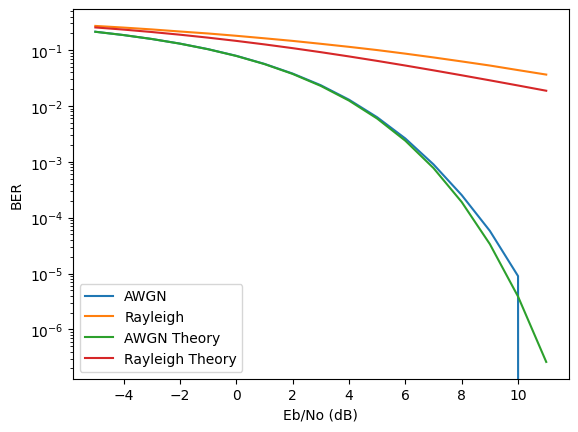

In [ ]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

N=int(1e6)


ip=np.random.rand(N)>0.5
s_ip=2*ip-1

Eb_No_Db=np.arange(-5,12)
N_Err_Awgn=np.zeros_like(Eb_No_Db,dtype=int)
N_Err_Rayleigh=np.zeros_like(Eb_No_Db,dtype=int)
noise=np.sqrt(1/2)*(np.random.randn(N)+1j*np.random.randn(N))


for idx ,eb in enumerate(Eb_No_Db):
  scale=10**(-eb/20)

  y_Awgn=s_ip+noise*scale
  h=np.sqrt(1/2)*(np.random.randn(N)+1j*np.random.randn(N))
  y_Rayleigh=(h*s_ip+scale*noise)/h

  y_Awgn_hat=np.real(y_Awgn)>.05
  y_Rayleigh_hat=np.real(y_Rayleigh)>0.5

  N_Err_Awgn[idx]=np.sum(y_Awgn_hat!=ip)
  N_Err_Rayleigh[idx]=np.sum(y_Rayleigh_hat!=ip)


Ber_Awgn=N_Err_Awgn/N
Ber_Rayleigh=N_Err_Rayleigh/N

theroy_Awgn=0.5*sp.erfc(np.sqrt(10**(Eb_No_Db/10)))
theroy_Rayleigh=0.5 * (1 - np.sqrt(10**(Eb_No_Db/10) / (1 + 10**(Eb_No_Db/10))))

plt.figure()
plt.semilogy(Eb_No_Db,Ber_Awgn,label='AWGN')
plt.semilogy(Eb_No_Db,Ber_Rayleigh,label='Rayleigh')
plt.semilogy(Eb_No_Db,theroy_Awgn,label='AWGN Theory')
plt.semilogy(Eb_No_Db,theroy_Rayleigh,label='Rayleigh Theory')
plt.xlabel('Eb/No (dB)')
plt.ylabel('BER')
plt.legend()
plt.show()


In [ ]:
import socket

# Server Code
def start_server(host='0.0.0.0', port=5001, buffer_size=4096, filename='received_file.txt'):
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.bind((host, port))
    server_socket.listen(5)
    print(f"[*] Listening on {host}:{port}")

    conn, addr = server_socket.accept()
    print(f"[+] Connection from {addr}")

    with open(filename, 'wb') as file:
        while True:
            data = conn.recv(buffer_size)
            if not data:
                break
            file.write(data)

    print(f"[+] File received and saved as {filename}")
    conn.close()
    server_socket.close()

if __name__ == "__main__":  # use comeented in exam as only data is to transfer not file name
    start_server()




In [ ]:
import socket

# Client Code
def send_file(server_host, server_port, file_path, buffer_size=4096):
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    client_socket.connect((server_host, server_port))
    print(f"[+] Connected to {server_host}:{server_port}")

    with open(file_path, 'rb') as file:
        while (chunk := file.read(buffer_size)):
            client_socket.sendall(chunk)

    print("[+] File sent successfully")
    client_socket.close()

if __name__ == "__main__":
    send_file("127.0.0.1", 5001, "main.txt")